In [76]:
import pandas as pd
from functools import reduce
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import mpldatacursor
from ipywidgets import widgets

In [2]:
# Display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/var/folders/g2/_hhqt3pn4n76_vq5vk4cmfy40000gn/T/ipykernel_41483/2486325513.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [3]:
# Load Data
df20 = pd.read_excel("Statistiche_Fantacalcio_2020-21.xlsx", header=1)
df19 = pd.read_excel("Statistiche_Fantacalcio_2019-20.xlsx", header=1)
df18 = pd.read_excel("Statistiche_Fantacalcio_2018-19.xlsx", header=1)
df17 = pd.read_excel("Statistiche_Fantacalcio_2017-18.xlsx", header=1)

In [4]:
# Remove players who played less than 10 games
MIN_GAMES = 10
df20 = df20[df20.Pg >= MIN_GAMES]
df19 = df19[df19.Pg >= MIN_GAMES]
df18 = df18[df18.Pg >= MIN_GAMES]
df17 = df17[df17.Pg >= MIN_GAMES]

In [5]:
# Merge every year
data = [df20, df19, df18]
dfv1 = reduce(lambda left, right: pd.merge(left, right, on=["Nome"], how="left"), data)

In [6]:
dfv1.columns

Index(['Id_x', 'R_x', 'Nome', 'Squadra_x', 'Pg_x', 'Mv_x', 'Mf_x', 'Gf_x',
       'Gs_x', 'Rp_x', 'Rc_x', 'R+_x', 'R-_x', 'Ass_x', 'Amm_x', 'Esp_x',
       'Au_x', 'Id_y', 'R_y', 'Squadra_y', 'Pg_y', 'Mv_y', 'Mf_y', 'Gf_y',
       'Gs_y', 'Rp_y', 'Rc_y', 'R+_y', 'R-_y', 'Ass_y', 'Amm_y', 'Esp_y',
       'Au_y', 'Id', 'R', 'Squadra', 'Pg', 'Mv', 'Mf', 'Gf', 'Gs', 'Rp', 'Rc',
       'R+', 'R-', 'Ass', 'Amm', 'Esp', 'Au'],
      dtype='object')

In [7]:
# Rename Cols
cols = {"Id_x":"Id20", "R_x":"R20", "Squadra_x":"Squadra20", "Pg_x":"Pg20", "Mv_x":"Mv20",
       "Mf_x":"Mf20", "Gf_x":"Gf20", "Gs_x":"Gs20", "Rp_x":"Rp20", "Rc_x":"Rc20", "R+_x":"R+20",
       "R-_x":"R-20", "Ass_x":"Ass20", "Amm_x":"Amm20", "Esp_x":"Esp20", "Au_x":"Au20",
       "Id_y":"Id19", "R_y":"R19", "Squadra_y":"Squadra19", "Pg_y":"Pg19", "Mv_y":"Mv19",
       "Mf_y":"Mf19", "Gf_y":"Gf19", "Gs_y":"Gs19", "Rp_y":"Rp19", "Rc_y":"Rc19", "R+_y":"R+19",
       "R-_y":"R-19", "Ass_y":"Ass19", "Amm_y":"Amm19", "Esp_y":"Esp19", "Au_y":"Au19",
       "Id":"Id18", "R":"R18", "Squadra":"Squadra18", "Pg":"Pg18", "Mv":"Mv18",
       "Mf":"Mf18", "Gf":"Gf18", "Gs":"Gs18", "Rp":"Rp18", "Rc":"Rc18", "R+":"R+18",
       "R-":"R-18", "Ass":"Ass18", "Amm":"Amm18", "Esp":"Esp18", "Au":"Au18"}
dfv1 = dfv1.rename(columns=cols)

In [8]:
dfv1.columns

Index(['Id20', 'R20', 'Nome', 'Squadra20', 'Pg20', 'Mv20', 'Mf20', 'Gf20',
       'Gs20', 'Rp20', 'Rc20', 'R+20', 'R-20', 'Ass20', 'Amm20', 'Esp20',
       'Au20', 'Id19', 'R19', 'Squadra19', 'Pg19', 'Mv19', 'Mf19', 'Gf19',
       'Gs19', 'Rp19', 'Rc19', 'R+19', 'R-19', 'Ass19', 'Amm19', 'Esp19',
       'Au19', 'Id18', 'R18', 'Squadra18', 'Pg18', 'Mv18', 'Mf18', 'Gf18',
       'Gs18', 'Rp18', 'Rc18', 'R+18', 'R-18', 'Ass18', 'Amm18', 'Esp18',
       'Au18'],
      dtype='object')

In [9]:
# Merge last df
dfMain = reduce(lambda left, right: pd.merge(left, right, on=["Nome"], how="left"), [dfv1, df17])

In [10]:
# Rename Cols
cols = {"Id":"Id17", "R":"R17", "Squadra":"Squadra17", "Pg":"Pg17", "Mv":"Mv17",
       "Mf":"Mf17", "Gf":"Gf17", "Gs":"Gs17", "Rp":"Rp17", "Rc":"Rc17", "R+":"R+17",
       "R-":"R-17", "Ass":"Ass17", "Amm":"Amm17", "Esp":"Esp17", "Au":"Au17"}
dfMain = dfMain.rename(columns=cols)

In [11]:
# Keep players who played at least last 2 most recent years
cols_rm = ["Mf18", "Mf19", "Mf20"]
idxs_to_remove = dfMain[cols_rm[-2:]].isnull().any(axis=1)
df = dfMain[~idxs_to_remove]

In [12]:
df.head()

,Id20,R20,Nome,Squadra20,Pg20,Mv20,Mf20,Gf20,Gs20,Rp20,Rc20,R+20,R-20,Ass20,Amm20,Esp20,Au20,Id19,R19,Squadra19,Pg19,Mv19,Mf19,Gf19,Gs19,Rp19,Rc19,R+19,R-19,Ass19,Amm19,Esp19,Au19,Id18,R18,Squadra18,Pg18,Mv18,Mf18,Gf18,Gs18,Rp18,Rc18,R+18,R-18,Ass18,Amm18,Esp18,Au18,Id17,R17,Squadra17,Pg17,Mv17,Mf17,Gf17,Gs17,Rp17,Rc17,R+17,R-17,Ass17,Amm17,Esp17,Au17
1,11,D,CONTI,Parma,14,5.39,5.22,0,0,0,0,0,0,0,3,0,0,11.0,D,Milan,23.0,5.69,5.60,0.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,0.0,0.0,11.0,D,Milan,12.0,5.78,5.83,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15,D,MASIELLO,Genoa,30,5.68,5.58,0,0,0,0,0,0,0,6,0,0,15.0,D,Genoa,22.0,5.80,5.73,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,15.0,D,Atalanta,24.0,5.83,5.67,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0,15.0,D,Atalanta,31.0,6.26,6.56,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
3,20,C,CIGARINI,Crotone,14,5.86,5.68,0,0,0,0,0,0,0,3,1,0,20.0,C,Cagliari,22.0,6.02,5.98,0.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,1.0,0.0,20.0,C,Cagliari,25.0,5.87,5.72,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,0.0,0.0,20.0,C,Cagliari,26.0,5.85,5.81,2.0,0.0,0.0,1.0,0.0,1.0,3.0,12.0,1.0,0.0
4,22,C,DE ROON,Atalanta,35,6.07,6.06,1,0,0,0,0,0,1,7,1,0,22.0,C,Atalanta,35.0,5.97,6.06,2.0,0.0,0.0,0.0,0.0,0.0,5.0,12.0,0.0,1.0,22.0,C,Atalanta,35.0,6.01,6.10,1.0,0.0,0.0,1.0,1.0,0.0,1.0,8.0,0.0,0.0,22.0,C,Atalanta,34.0,5.92,6.02,2.0,0.0,0.0,2.0,1.0,1.0,2.0,8.0,1.0,0.0
5,26,C,GOMEZ,Atalanta,10,6.55,7.95,4,0,0,0,0,0,2,0,0,0,26.0,C,Atalanta,36.0,6.71,7.62,7.0,0.0,0.0,0.0,0.0,0.0,13.0,2.0,0.0,0.0,26.0,A,Atalanta,35.0,6.21,7.03,7.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,0.0,0.0,26.0,A,Atalanta,33.0,6.32,7.02,4.0,0.0,0.0,3.0,2.0,1.0,9.0,2.0,0.0,0.0


# Analysis

## Trends

In [13]:
# Players with constant positive trend (Fantavoto)
COLS_TRENDS = ["Nome", "Delta1", "Delta2", "Delta3", "Mf18", "Mf19", "Mf20"]

data_positive_trend = []
for id_player in df.index:
    player = df.loc[id_player]
    # Calulcate score difference between seasons
    curr_mf = player[cols_rm].dropna()
    curr_deltas = [0] * (4 - len(curr_mf)) # delta == 0 for missing years
    curr_deltas.extend([curr_mf[i+1] - curr_mf[i] for i in range(len(curr_mf)-1)])
    
    # Check if player has positive differences only
    n_negative_deltas = sum(np.array(curr_deltas) < 0)
    if n_negative_deltas == 0:
        # add player to dataset
        row = [player["Nome"]]
        row.extend(curr_deltas)
        row.extend(player[cols_rm])
        data_positive_trend.append(row)
        
# Create df
df_positive_trend = pd.DataFrame(data=data_positive_trend, columns=COLS_TRENDS)
print(f"Numver of players with positive trend: {len(df_positive_trend)}")
df_positive_trend

Numver of players with positive trend: 78


,Nome,Delta1,Delta2,Delta3,Mf18,Mf19,Mf20
0,GOMEZ,0,0.59,0.33,7.03,7.62,7.95
1,FERRARI A.,0,0.00,0.18,NaN,5.67,5.85
2,PERIN,0,0.00,0.54,NaN,4.29,4.83
3,KUCKA,0,0.11,0.12,6.56,6.67,6.79
4,LAZOVIC,0,0.25,0.01,6.32,6.57,6.58
5,D'AMBROSIO,0,0.39,0.54,6.19,6.58,7.12
6,MEDEL,0,0.00,0.21,NaN,5.65,5.86
7,CACERES,0,0.16,0.05,5.75,5.91,5.96
8,CERRI,0,0.57,0.08,5.50,6.07,6.15
9,CANDREVA,0,0.60,0.01,6.27,6.87,6.88


In [17]:
df_positive_trend[df_positive_trend.Delta3 > 0.5]

,Nome,Delta1,Delta2,Delta3,Mf18,Mf19,Mf20
2,PERIN,0,0.00,0.54,NaN,4.29,4.83
5,D'AMBROSIO,0,0.39,0.54,6.19,6.58,7.12
15,MURIEL,0,1.06,0.94,6.92,7.98,8.92
17,BERARDI,0,1.08,0.52,6.77,7.85,8.37
22,PEZZELLA GIU.,0,0.00,0.53,NaN,5.66,6.19
23,FAVILLI,0,0.00,0.99,NaN,5.57,6.56
25,BARELLA,0,0.02,0.52,6.07,6.09,6.61
32,BARAK,0,0.00,0.51,NaN,6.18,6.69
33,VERETOUT,0,0.48,0.61,6.27,6.75,7.36
40,DARMIAN,0,0.00,0.68,NaN,5.95,6.63


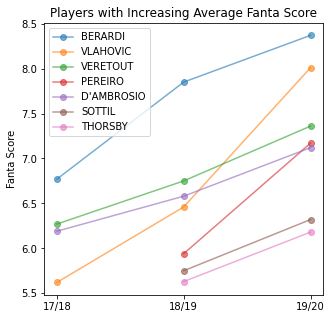

In [20]:
# Plot positive trends

X_TICKS = ["17/18", "18/19", "19/20"]

#names = []
names = ["VERETOUT", "D'AMBROSIO", "BERARDI", "VLAHOVIC", "THORSBY", "PEREIRO",
        "SOTTIL"]

# Get data
if len(names) > 0:
    data = df_positive_trend[df_positive_trend['Nome'].isin(names)]
    data = data.sort_values(['Mf20'], ascending=False)
    names = data['Nome'].values
    data = data.values[:, 4:]
else:
    data = df_positive_trend.values[:, 4:]
    
# Plot data
fig, ax = plt.subplots(figsize=(5,5))
for i_row, row in enumerate(data):  # for each player...
    if len(names) > 0:
        curr_label = names[i_row]
    else:
        curr_label = df_positive_trend.iloc[i_row, :]['Nome']
    ax.plot(row, marker='o', alpha=0.6, label=curr_label)
    
# Initialize interactive tooltip
mpldatacursor.datacursor(formatter='{label}'.format)

# Add title and labels
plt.xticks(range(len(X_TICKS)), X_TICKS)
plt.title('Players with Increasing Average Fanta Score')
plt.ylabel('Fanta Score')
if len(names) > 0:
    plt.legend()

In [25]:
# Players with constant negative trend

COLS_TRENDS = ["Nome", "Delta1", "Delta2", "Delta3", "Mf18", "Mf19", "Mf20"]

data_negative_trend = []
for id_player in df.index:
    player = df.loc[id_player]
    # Calculate score difference between seasons
    curr_mf = player[cols_rm].dropna()
    curr_deltas = [0] * (4 - len(curr_mf))  # delta == 0 for missing years
    curr_deltas.extend([curr_mf[i+1] - curr_mf[i] for i in range(len(curr_mf) - 1)])
    
    # Check if player has negative differences only
    n_positive_deltas = sum(np.array(curr_deltas) > 0)
    if n_positive_deltas == 0:
        # add player to dataset
        row = [player['Nome']]
        row.extend(curr_deltas)
        row.extend(player[cols_rm])
        data_negative_trend.append(row)

# Create DataFrame and preview it
df_negative_trend = pd.DataFrame(data=data_negative_trend, 
                                 columns=COLS_TRENDS)
print(f"Number of players with negative trend: {len(df_negative_trend)}")
df_negative_trend.head()

Number of players with negative trend: 83


,Nome,Delta1,Delta2,Delta3,Mf18,Mf19,Mf20
0,CONTI,0,-0.23,-0.38,5.83,5.60,5.22
1,DE ROON,0,-0.04,0.00,6.10,6.06,6.06
2,GRASSI,0,0.00,-0.45,NaN,6.00,5.55
3,KURTIC,0,-0.61,-0.11,6.75,6.14,6.03
4,INGLESE,0,-0.90,-0.65,7.24,6.34,5.69


In [26]:
df_negative_trend[df_negative_trend.Delta3 < -0.5]

,Nome,Delta1,Delta2,Delta3,Mf18,Mf19,Mf20
4,INGLESE,0,-0.90,-0.65,7.24,6.34,5.69
14,LLORENTE,0,0.00,-1.00,NaN,6.91,5.91
15,CATALDI,0,-0.42,-0.64,6.64,6.22,5.58
21,CALLEJON,0,-0.19,-0.62,6.71,6.52,5.90
24,BONAZZOLI,0,0.00,-0.66,NaN,7.19,6.53
25,DUNCAN,0,-0.16,-0.64,6.60,6.44,5.80
26,BRUNO PERES,0,0.00,-0.53,NaN,6.47,5.94
31,KALINIC,0,0.00,-1.82,NaN,7.85,6.03
36,LAPADULA,0,0.00,-0.77,NaN,7.27,6.50
38,CORNELIUS,0,0.00,-2.00,NaN,7.83,5.83


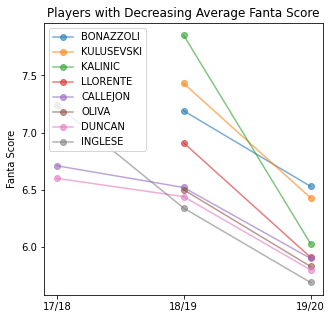

In [27]:
# Plot negative trends

X_TICKS = ["17/18", "18/19", "19/20"]

names = []
names = ["INGLESE", "CALLEJON", "BONAZZOLI", "DUNCAN", "KALINIC", 
         "KULUSEVSKI", "OLIVA", "LLORENTE"]

if len(names) > 0:
    data = df_negative_trend[df_negative_trend['Nome'].isin(names)]
    data = data.sort_values(['Mf20'], ascending=False)
    names = data['Nome'].values
    data = data.values[:, 4:]
else:
    data = df_negative_trend.values[:, 4:]

# Plot data
fig, ax = plt.subplots(figsize=(5,5))
for i_row, row in enumerate(data):
    if len(names) > 0:
        curr_label = names[i_row]
    else:
        curr_label = df_negative_trend.iloc[i_row, :]['Nome']
    ax.plot(row, marker='o', alpha=0.6, label=curr_label)
    
# Initialize interactive tooltip
mpldatacursor.datacursor(formatter='{label}'.format)

# Add title and labels
plt.xticks(range(len(X_TICKS)), X_TICKS)
plt.title('Players with Decreasing Average Fanta Score')
plt.ylabel('Fanta Score')
if len(names) > 0:
    plt.legend()

## Deltas

In [28]:
# Players' delta - difference between first and last season

COLS_MF = ["Mf17", "Mf18", "Mf19", "Mf20"]
COLS_DELTAS = ["Nome", "Delta", "Squadra20", "Mf17", "Mf18", "Mf19", "Mf20"]

data_deltas = []
for id_player in df.index:
    player = df.loc[id_player]
    #Calculate delta
    curr_mf = player[COLS_MF].dropna()
    curr_delta = curr_mf[-1] - curr_mf[0]
    # Append to dataset
    row = [player["Nome"]]
    row.append(curr_delta)
    row.append(player["Squadra20"])
    row.extend(player[COLS_MF])
    data_deltas.append(row)
    
#Create DF
df_deltas = pd.DataFrame(data=data_deltas, columns=COLS_DELTAS)
df_deltas = df_deltas.sort_values(['Delta'])  # sort by delta
df_deltas.head()

,Nome,Delta,Squadra20,Mf17,Mf18,Mf19,Mf20
160,CUTRONE,-1.60,Fiorentina,7.31,6.17,6.64,5.71
25,BERNARDESCHI,-1.55,Juventus,7.34,6.26,5.56,5.79
63,VERDI,-1.54,Torino,7.45,6.53,6.20,5.91
48,DYBALA,-1.53,Juventus,8.42,6.56,7.84,6.89
118,IMMOBILE,-1.50,Lazio,9.20,7.41,9.49,7.70


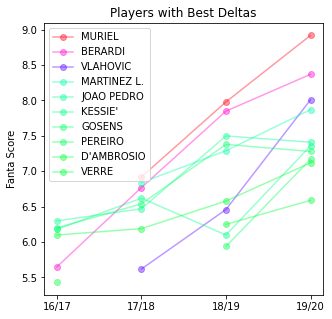

In [29]:
# Players with best positive deltas

X_TICKS = ["16/17", "17/18", "18/19", "19/20"]

# Get data
N = 10 + 1
df_deltas_best = df_deltas.iloc[range(len(df_deltas)-1, len(df_deltas)-N, -1), :]
data = df_deltas_best.sort_values(['Mf20'], ascending=False)
labels = data['Nome'].values
data = data.values[:, 3:]
delta_max = df_deltas_best['Delta'].max()

# Plot data
fig, ax = plt.subplots(figsize=(5,5))
for i_row, row in enumerate(data):  
    curr_delta = df_deltas_best.iloc[i_row, :]['Delta']
    curr_label = labels[i_row]
    curr_col = cm.hsv(curr_delta / delta_max)
    ax.plot(row, marker='o', 
            c=curr_col, alpha=0.4,
            label=curr_label)
    
# Initialize interactive tooltip
mpldatacursor.datacursor(formatter='{label}'.format)

# Add title and labels
plt.xticks(range(len(X_TICKS)), X_TICKS)
plt.title('Players with Best Deltas')
plt.ylabel('Fanta Score')
plt.legend()

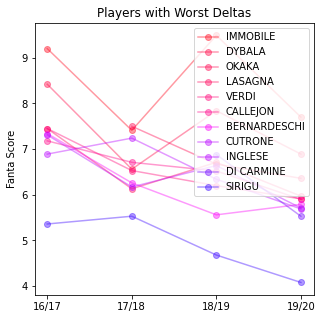

In [30]:
# Players with worst deltas

X_TICKS = ["16/17", "17/18", "18/19", "19/20"]

# Get data
N = 10 + 1
df_deltas_worst = df_deltas.iloc[:N, :]
data = df_deltas_worst.sort_values(['Mf20'], ascending=False)
labels = data['Nome'].values
data = data.values[:, 3:]
delta_min = df_deltas_worst['Delta'].min()

# Plot data
fig, ax = plt.subplots(figsize=(5,5))
for i_row, row in enumerate(data):
    curr_delta = df_deltas_worst.iloc[i_row, :]['Delta']
    curr_label = labels[i_row]
    curr_col = cm.hsv(abs(curr_delta / delta_min))
    ax.plot(row, marker='o', 
            c=curr_col, alpha=0.4,
            label=curr_label)
    
# Initialize interactive tooltip
mpldatacursor.datacursor(formatter='{label}'.format)

# Add title and labels
plt.xticks(range(len(X_TICKS)), X_TICKS)
plt.title('Players with Worst Deltas')
plt.ylabel('Fanta Score')
plt.legend()

## Career Mean

In [34]:
# Players' global mean

COLS_MF = ["Mf17", "Mf18", "Mf19", "Mf20"]
COLS_MEANS = ["Nome", "Mean", "Squadra20", "R20", "Mf17", "Mf18", "Mf19", "Mf20"]

data_means = []

for id_player in df.index:
    player = df.loc[id_player]
    # Calculate mean
    curr_mf = player[COLS_MF].dropna()
    curr_mean = np.mean(curr_mf)
    # Append to dataset
    row = [player['Nome']]
    row.append(curr_mean)
    row.append(player['Squadra20'])
    row.append(player['R20'])
    row.extend(player[COLS_MF])
    data_means.append(row)
    
# Create DataFrame
df_means = pd.DataFrame(data=data_means, columns=COLS_MEANS)
df_means = df_means.sort_values(['Mean'])  # sort by delta
df_means.head()

,Nome,Mean,Squadra20,R20,Mf17,Mf18,Mf19,Mf20
20,SEPE,4.426667,Parma,P,NaN,4.43,4.96,3.89
13,SKORUPSKI,4.523333,Bologna,P,NaN,4.62,4.31,4.64
115,AUDERO,4.683333,Sampdoria,P,NaN,4.65,4.29,5.11
261,PAU LOPEZ,4.715000,Roma,P,NaN,NaN,4.72,4.71
86,CONSIGLI,4.742500,Sassuolo,P,4.73,4.89,4.42,4.93


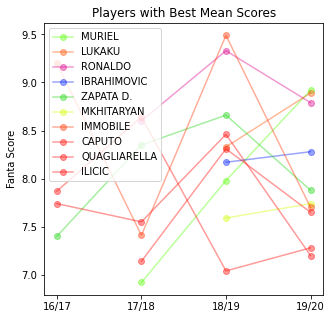

In [35]:
# Players with best mean scores

X_TICKS = ["16/17", "17/18", "18/19", "19/20"]

# Get data
N = 10 + 1
df_means_best = df_means.iloc[range(len(df_means)-1, len(df_means)-N, -1), :]
data = df_means_best.sort_values(['Mf20'], ascending=False)
labels = data['Nome'].values
data = data.values[:, 4:]
mean_max = df_means_best['Mean'].max()

# Plot data
fig, ax = plt.subplots(figsize=(5,5))
for i_row, row in enumerate(data):
    curr_mean = df_means_best.iloc[i_row, :]['Mean']
    curr_label = labels[i_row]
    curr_col = cm.prism(curr_mean / mean_max)
    ax.plot(row, marker='o', 
            c=curr_col, alpha=0.4,
            label=curr_label)
    
# Initialize interactive tooltip
mpldatacursor.datacursor(formatter='{label}'.format)

# Add title and labels
plt.xticks(range(len(X_TICKS)), X_TICKS)
plt.title('Players with Best Mean Scores')
plt.ylabel('Fanta Score')
plt.legend()

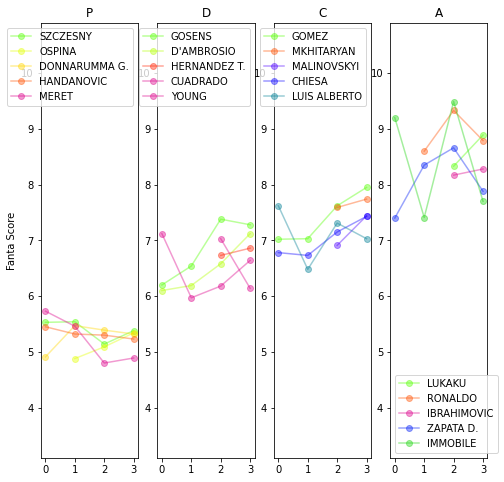

In [72]:
# Best mean scores by role

# Constants
ROLES = ['P', 'D', 'C', 'A']
X_TICKS = ["16/17", "17/18", "18/19", "19/20"]
N = 5 + 1

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(8,8))
ax = (ax1, ax2, ax3, ax4)

for (i_role, role) in enumerate(ROLES):
    # Get data
    df_means_role = df_means[df_means['R20'] == role]
    df_means_best_role = df_means_role.iloc[range(len(df_means_role)-1, len(df_means_role)-N, -1), :]
    #print(df_means_best_role)
    data = df_means_best_role.sort_values(['Mf20'], ascending=False)
    labels = data['Nome'].values
    data = data.values[:, 4:]
    mean_max = df_means_best_role['Mean'].max()
    
    # Plot data
    for i_row, row in enumerate(data):
        curr_mean = df_means_best_role.iloc[i_row, :]['Mean']
        curr_label = labels[i_row]
        curr_col = cm.prism(curr_mean / mean_max)
        ax[i_role].plot(row, marker='o', 
                        c=curr_col, alpha=0.4,
                        label=curr_label)
        
        
    # Initialize interactive tooltip
    mpldatacursor.datacursor(formatter='{label}'.format)

    # Add title and labels
    ax[i_role].set_xticks([0,1,2,3])
    ax[i_role].set_title(role)
    if i_role == 0:
        ax[i_role].set_ylabel('Fanta Score')
    ax[i_role].legend()
    ax[i_role].set_ylim([3.1, 10.9])

## Weighted scores

In [73]:
def _sort_players_by_weighted_score(df, w_d, w_m, w_t, w_y, role=''):
    # Constants
    COLS_MF = ['Mf17', 'Mf18', 'Mf19', 'Mf20']
    COLS_REDUX = ['Nome', 'R20', 'Squadra20', 'Mf17', 'Mf18', 'Mf19', 'Mf20']
    COLS_WEIGHTS = ['Nome', 'R20', 'Squadra20', 'Mf20',
                    'WeightedScore', 'DeltaScore', 'MeanScore', 'TrendScore', 'YearsScore']
    # Filter dataframe
    df_redux = df[COLS_REDUX]
    if len(role) > 0:
        df_redux = df_redux[df_redux['R20'] == role]
    data_weight_score = []
    for id_player in df_redux.index:  # for each player...
        player = df_redux.loc[id_player]
        name = player['Nome']
        # Calculate weighted score
        score = df_redux['Mf20'].values[0]
        score_d = w_d * df_deltas[df_deltas['Nome'] == name]['Delta'].values[0]
        score_m = w_m * df_means[df_means['Nome'] == name]['Mean'].values[0]
        score_t = 0
        if name in df_positive_trend['Nome'].values:
            score_t = w_t
        curr_mf = player[COLS_MF].dropna()
        score_y = w_y * len(curr_mf)
        score_weighted = score + score_d + score_m + score_t + score_y
        # Append to dataset
        row = [name]
        row.append(player['R20'])
        row.append(player['Squadra20'])
        row.append(player['Mf20'])
        row.append(score_weighted)
        row.extend([score_d, score_m, score_t, score_y])
        data_weight_score.append(row)
    # Create DataFrame and return it
    df_weight_scores = pd.DataFrame(data=data_weight_score, 
                                    columns=COLS_WEIGHTS)
    df_weight_scores = df_weight_scores.sort_values(['WeightedScore'])
    return df_weight_scores

In [91]:
from IPython.display import clear_output
plt.style.use('ggplot')

# Texts
WIDTH_TEXT = 50
text_delta = widgets.FloatText(description="Delta Weight", 
                          value="0.8",
                          width=WIDTH_TEXT)
text_mean = widgets.FloatText(description="Mean Weight", 
                          value="0.7",
                          width=WIDTH_TEXT)
text_trend = widgets.FloatText(description="Trend Weight", 
                          value="1.0",
                          width=WIDTH_TEXT)
text_years = widgets.FloatText(description="Years Weight", 
                          value="0.8",
                          width=WIDTH_TEXT)
display(text_delta)
display(text_mean)
display(text_trend)
display(text_years)

# Dropdown
dropdown_role =  widgets.Dropdown(
    options=['P', 'D', 'C', 'A', 'All'],
    value='A',
    description='Role:',
    disabled=False,
)
display(dropdown_role)

# Button
button_calculate = widgets.Button(description="Calculate")
display(button_calculate)
def on_button_clicked(b):
    # Get values
    w_d = float(text_delta.value)
    w_m = float(text_mean.value)
    w_t = float(text_trend.value)
    w_y = float(text_years.value)
    role = dropdown_role.value
    if len(role) != 1:
        role = ''
    # Players with best weighted scores
    N = 20
    df_weighted_scores = _sort_players_by_weighted_score(df, 
                                                         w_d, w_m, w_t, w_y, role)
    clear_output()
    print(df_weighted_scores.iloc[range(len(df_weighted_scores)-1, 
                                        len(df_weighted_scores)-N, -1), :])
    
# Attach event to button    
button_calculate.on_click(on_button_clicked)

             Nome R20   Squadra20  Mf20  WeightedScore  DeltaScore  MeanScore  \
11  D'AMBROSIO     D   Inter       7.12  14.484250      0.816       4.548250    
53  GOSENS         D   Atalanta    7.28  14.079000      0.864       4.795000    
41  SPINAZZOLA     D   Roma        6.52  13.971500      0.480       4.371500    
59  NUYTINCK       D   Udinese     6.37  13.603500      0.224       4.259500    
35  CUADRADO       D   Juventus    6.64  13.270250     -0.384       4.534250    
62  MANCINI        D   Roma        6.41  13.188250      0.416       4.352250    
71  LYKOGIANNIS    D   Cagliari    6.10  13.176500     -0.056       4.112500    
51  HATEBOER       D   Atalanta    6.41  13.124500      0.368       4.336500    
37  PEZZELLA GIU.  D   Parma       6.19  13.022333      0.696       4.006333    
36  ANSALDI        D   Torino      6.33  13.017500      0.072       4.525500    
23  GOLDANIGA      D   Genoa       5.73  13.005750     -0.120       4.005750    
14  BONUCCI        D   Juven